In [5]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing , svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

df = pd.read_csv('tesla_stock_data.csv') #parse date does the datetime work for us
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date' , inplace=True)

print(df.head())
df.tail()


              Open    High     Low   Close  Adj Close       Volume
Date                                                              
2024-12-19  451.88  456.36  420.02  436.17     436.17  117,896,400
2024-12-18  466.50  488.54  427.01  440.13     440.13  149,340,800
2024-12-17  475.90  483.99  457.51  479.86     479.86  131,223,000
2024-12-16  441.09  463.19  436.15  463.02     463.02  114,083,800
2024-12-13  420.00  436.30  415.71  436.23     436.23   89,000,200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-06,1.33,1.33,1.06,1.07,1.07,"103,003,500"
2010-07-02,1.53,1.54,1.25,1.28,1.28,"77,097,000"
2010-07-01,1.67,1.73,1.35,1.46,1.46,"123,282,000"
2010-06-30,1.72,2.03,1.55,1.59,1.59,"257,806,500"
2010-06-29,1.27,1.67,1.17,1.59,1.59,"281,494,500"


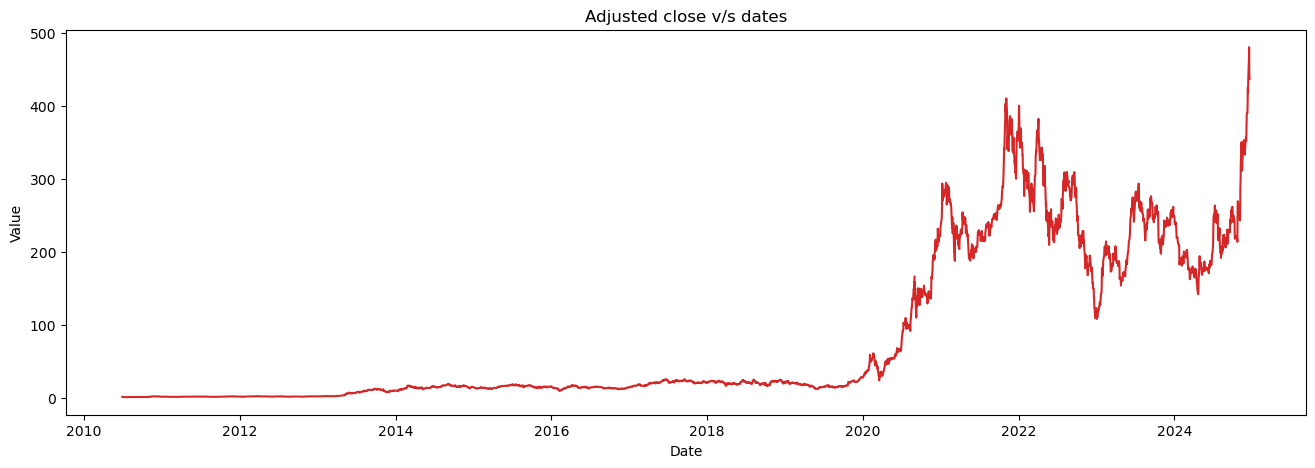

In [6]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Adj Close'], title='Adjusted close v/s dates')    

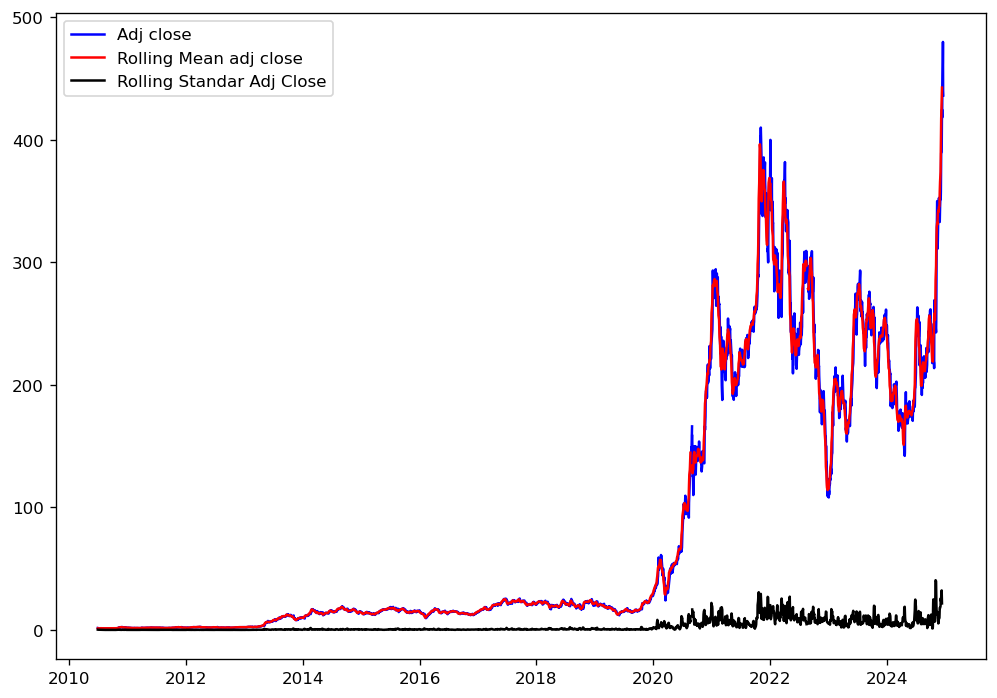

In [7]:
rolling_mean = df['Adj Close'].rolling(7).mean()
rolling_std = df['Adj Close'].rolling(7).std()

plt.plot(df['Adj Close'], color="blue",label="Adj close")
plt.plot(rolling_mean, color="red", label="Rolling Mean adj close")
plt.plot(rolling_std , color='black' , label='Rolling Standar Adj Close')
plt.legend(loc='best')

In [8]:
df['Adj close first difference'] = df['Adj Close'] - df['Adj Close'].shift(1)

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(df['Adj close first difference'].dropna())
df['Adj close first difference'].plot()

NameError: name 'adfuller' is not defined

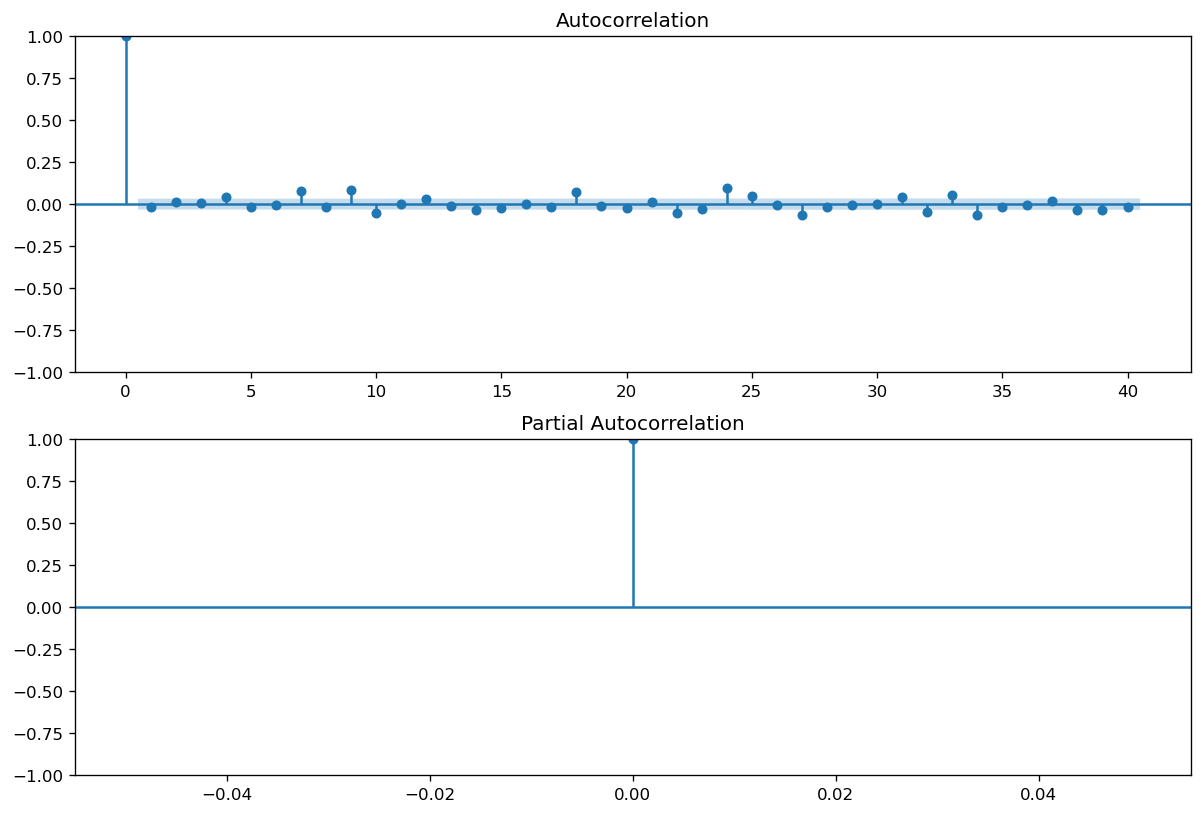

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Adj close first difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Adj close first difference'].iloc[1:],lags=40,ax=ax2)

In [ ]:
print(df.index)
df = df.sort_index()
print(df.index)

df.tail()

DatetimeIndex(['2024-12-19', '2024-12-18', '2024-12-17', '2024-12-16',
               '2024-12-13', '2024-12-12', '2024-12-11', '2024-12-10',
               '2024-12-09', '2024-12-06',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=3647, freq=None)
DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11',
               '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
               '2024-12-18', '2024-12-19'],
              dtype='datetime64[ns]', name='Date', length=3647, freq=None)


,Open,High,Low,Close,Adj Close,Volume,Adj close first difference
Date,,,,,,,
2024-12-13,420.00,436.30,415.71,436.23,436.23,"89,000,200",-26.79
2024-12-16,441.09,463.19,436.15,463.02,463.02,"114,083,800",-16.84
2024-12-17,475.90,483.99,457.51,479.86,479.86,"131,223,000",39.73
2024-12-18,466.50,488.54,427.01,440.13,440.13,"149,340,800",3.96
2024-12-19,451.88,456.36,420.02,436.17,436.17,"117,896,400",NaN


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3645
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11138.698
Date:                Sat, 21 Dec 2024   AIC                          22283.395
Time:                        20:12:42   BIC                          22301.998
Sample:                             0   HQIC                         22290.021
                               - 3645                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6058      0.240     -2.527      0.012      -1.076      -0.136
ma.L1          0.5873      0.244      2.406      0.016       0.109       1.066
sigma2        26.4582      0.201    131.374      0.0

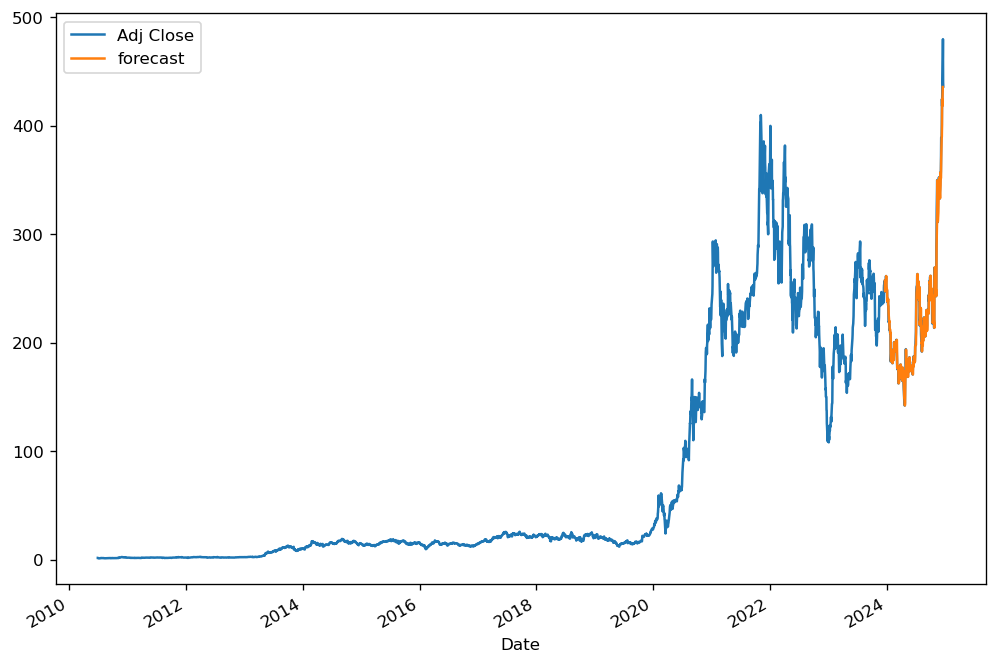

,Open,High,Low,Close,Adj Close,Volume,Adj close first difference,forecast
Date,,,,,,,,
2024-12-13,420.00,436.30,415.71,436.23,436.23,"89,000,200",-26.79,418.375648
2024-12-16,441.09,463.19,436.15,463.02,463.02,"114,083,800",-16.84,435.733554
2024-12-17,475.90,483.99,457.51,479.86,479.86,"131,223,000",39.73,NaN
2024-12-18,466.50,488.54,427.01,440.13,440.13,"149,340,800",3.96,NaN
2024-12-19,451.88,456.36,420.02,436.17,436.17,"117,896,400",NaN,NaN


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
df = df.sort_index()
df = df[~df.index.duplicated(keep='first')]


# Example: After fitting the ARIMA model
model = ARIMA(df['Adj Close'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


# df['forecast'] = model_fit.predict(start='2023-12-20', end='2024-12-16', dynamic=False)
df['forecast'] = model_fit.predict(start='2023-12-20', end='2024-12-16', dynamic=False)
df[['Adj Close', 'forecast']].plot()


plt.legend()
plt.show()

df.tail()
